# Week 6. Optimization. Programming Task

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house.


Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [106]:
import numpy as np
import pandas as pd

### Task 1. Reading

In [107]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [108]:
#!pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

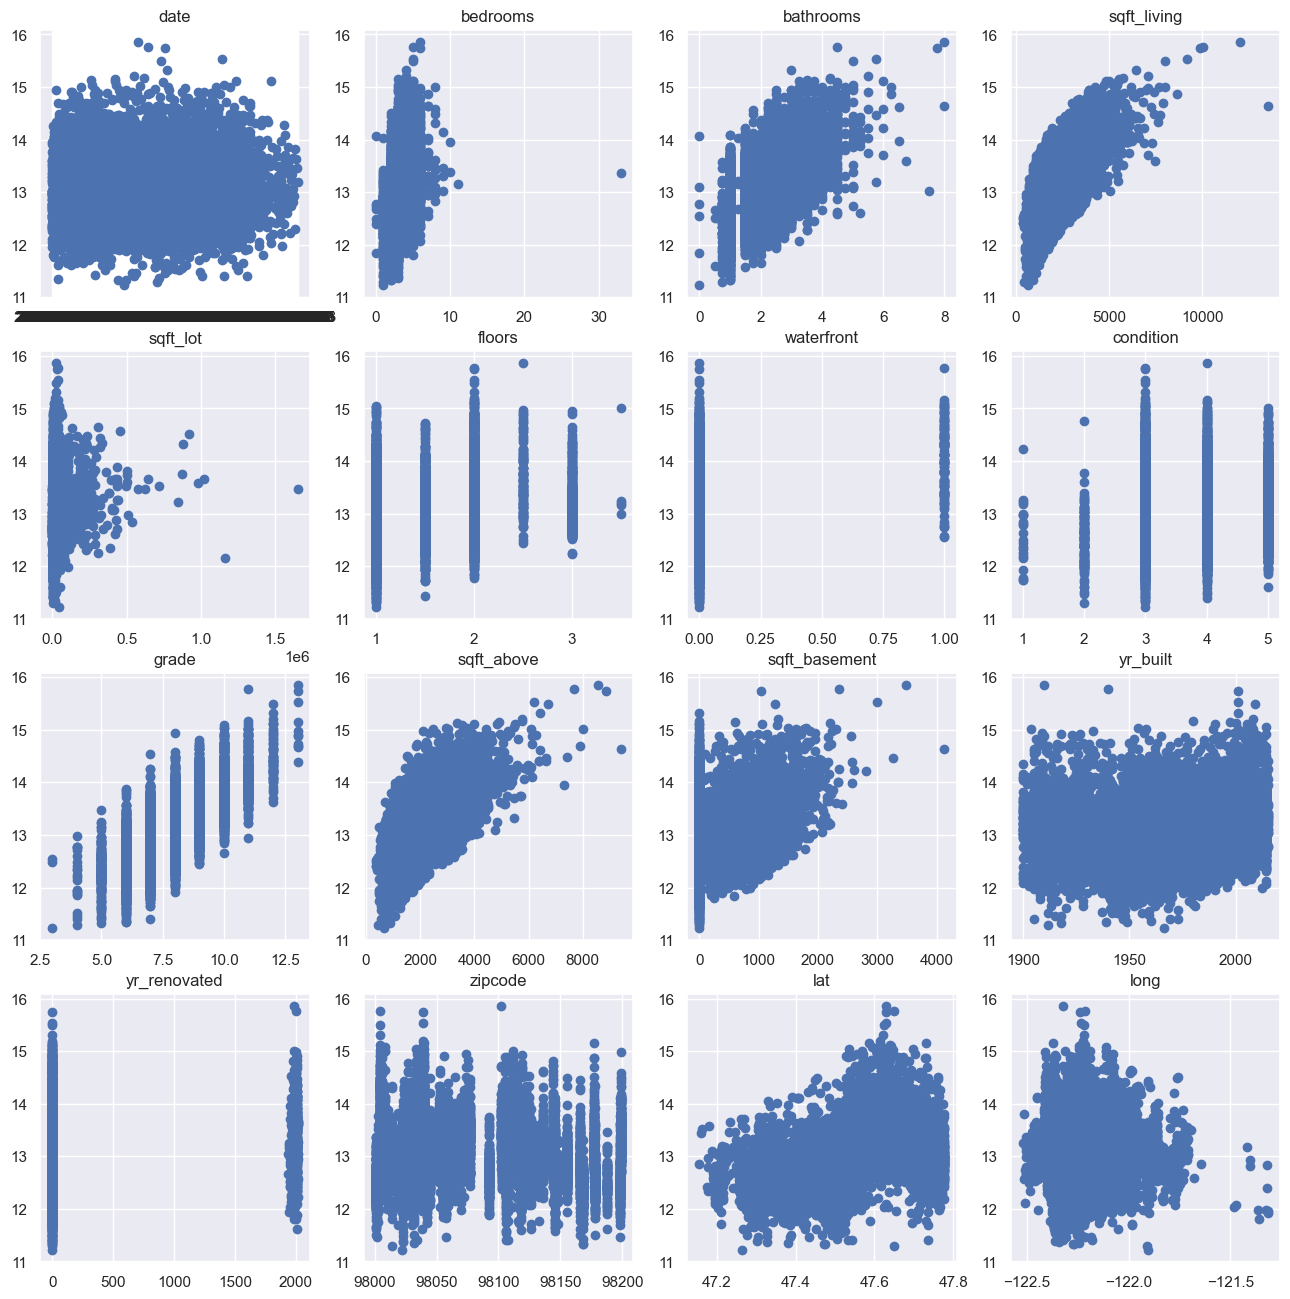

In [110]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [111]:
#your code goes here
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
           'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']

X = datX[cols]
ones = np.ones((len(X),1))
X = np.concatenate((ones, X), axis=1)
N = len(X)
m = len(X[0])

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$  function  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [112]:
def loss(w, X, y):
    #your code goes here
    lossValue = (X @ w - y) ** 2
    lossValue = np.mean(lossValue)
    return lossValue

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$\frac{\partial Loss}{\partial w_0} = \frac{1}{N}\sum_{i=1}^N 2(\hat y_i - y_i)
=\frac{2}{N}\sum_{i=1}^N(x_i\cdot w_i - y_i)=\frac{2}{N}(X\cdot w- y)$

$\frac{\partial Loss}{\partial w_k} = \frac{1}{N}\sum_{i=1}^N 2x_{ik}(\hat y_i - y_i)=\frac{2}{N} \vec{x}_k^T(X\cdot w-y)$

$\nabla Loss = \frac{2}{N}X^T(X\cdot w - y)$

### Task 4. Write a function to compute the gradient of the Loss function in the given point  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.


In [113]:
def grad(w_k, X, y):
    #your code goes here
    losses = (X @ w_k - y)
    lossGradient = 2 / N * X.T @ losses
    return lossGradient

### Task 5. Write gradient descent (2 points)
Now it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`.

In [114]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]

    curiter=0
    w_k=weights[-1]

    #your code goes here
    losses = [loss(w_init, X, y)]
    while curiter < maxiter:
      gradient = grad(w_k, X, y)
      w_k = w_k - alpha * gradient
      weights.append(w_k)
      lossValue_k = loss(w_k, X, y)
      losses.append(lossValue_k)
      if len(losses) > 1 and np.linalg.norm(gradient) < eps:
          break
      curiter += 1
    return weights, losses


Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

In [115]:
# Alpha = 1e-6, number of iterations: 100
# Divergent one, since learning rate is too big
ws = [0.592, 0.038, 0.357, 0.407, 0.148,
        0.764, 0.172, 0.790, 0.786, 0.173, 0.737]
result = gradDescent(ws, 1e-6, X, datY, 100)
ws_best, min_loss = result[0][-1], result[1][-1]
min_loss, ws_best


(3.090383827749656e+254,
 array([ 1.75980605e+120,  6.33872316e+120,  4.18710088e+120,
         4.37487816e+123,  2.81373059e+120,  5.95022379e+120,
         1.41935008e+121,  3.76996150e+123,  6.04916660e+122,
        -2.15039909e+122,  8.37009668e+121]))

Text(0.5, 1.0, 'Value of Loss function corresponding to the iteration number')

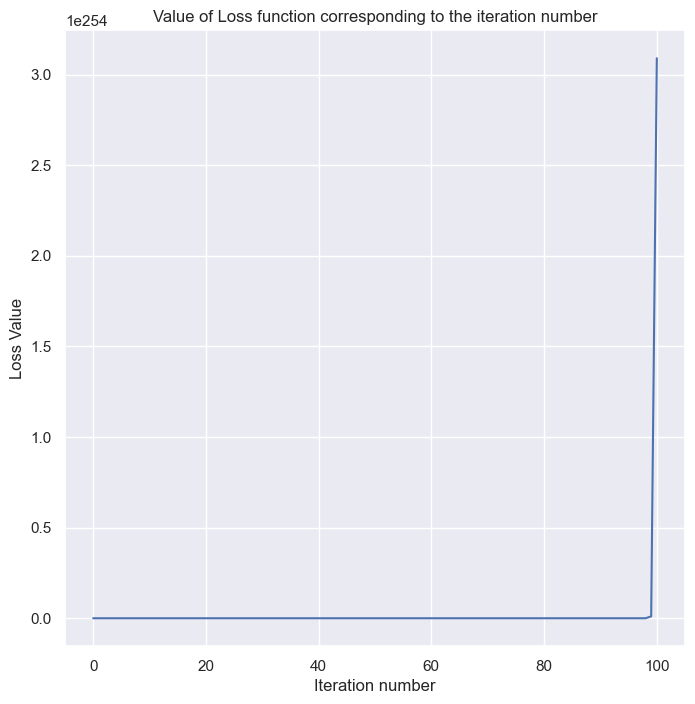

In [116]:
plt.figure(figsize=(8,8))

#your code goes here
losses_k = result[1]
iter_count = len(losses_k)
k = range(iter_count)

plt.plot(k, losses_k)
plt.xlabel('Iteration number')
plt.ylabel('Loss Value')
plt.title('Value of Loss function corresponding to the iteration number')

In [117]:
# Alpha = 1e-7, number of iterations: 1000
#The best I've got:
ws = [0.6078, 0.1901 , 0.7062, 0.4724, 0.2591,
        0.9920, 0.3809, 0.7867, 0.4222, 0.2684,
        0.9131]
result = gradDescent(ws, 1e-7, X, datY, 1000)
ws_best, min_loss = result[0][-1], result[1][-1]
min_loss, ws_best


(0.63727054836115,
 array([ 0.6074965 ,  0.18898102,  0.70546878, -0.24600346,  0.25865536,
         0.99087894,  0.37850668,  0.24518528,  0.24531125,  0.30549355,
         0.8986646 ]))

Text(0.5, 1.0, 'Value of Loss function corresponding to the iteration number')

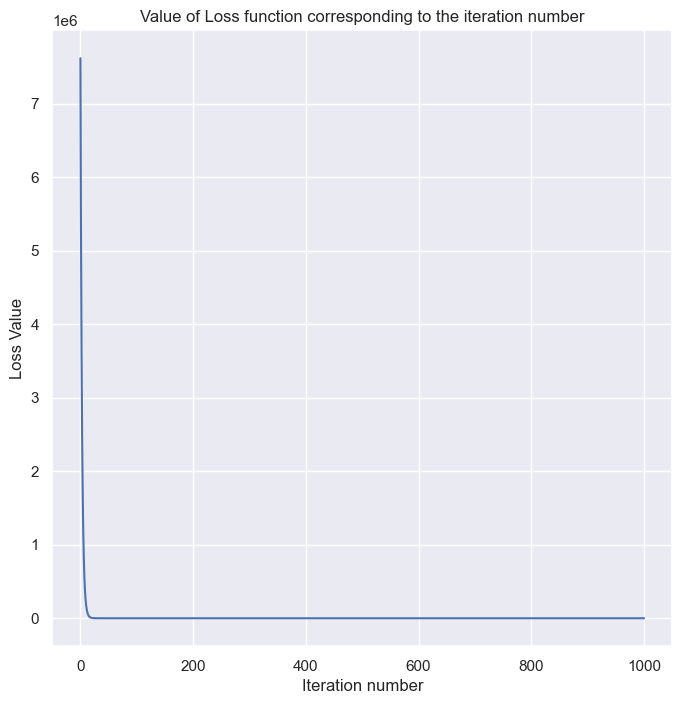

In [118]:
plt.figure(figsize=(8,8))

#your code goes here
losses_k = result[1]
iter_count = len(losses_k)
k = range(iter_count)

plt.plot(k, losses_k)
plt.xlabel('Iteration number')
plt.ylabel('Loss Value')
plt.title('Value of Loss function corresponding to the iteration number')

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [119]:
### your code goes here
inputs_number = 10
selected = [np.random.randint(1, len(X)) for _ in range(inputs_number)]

x_selected = X[selected]
y_selected = datY[selected]
print('Difference between best prediction and actual y-values')
print(x_selected @ ws_best - y_selected, sep=',')

Difference between best prediction and actual y-values
[-0.76019898 -1.20431344  0.41343539 -0.34999607  0.08027046  1.14469679
  0.70737264  1.41721946  0.41926942 -0.84333335]


Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

**ANSWER**

If we take into consideration that y-values vary from 11.22 to 15.85 on logarithmic scale, than it becomes obvious, that our predictions are not good enough.

In some cases the difference between predicted and actual values is small,
sometimes rather close to 0, but in many others this difference might be comparable to a half of the range of y-values

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [120]:
def norm(X):
    # your code goes here
    dfX = (X - X.mean())/X.std()
    return dfX

cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
           'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']
X = datX[cols]
X = norm(X)

ones = np.ones((len(X),1))
X = np.concatenate((ones, X), axis=1)

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

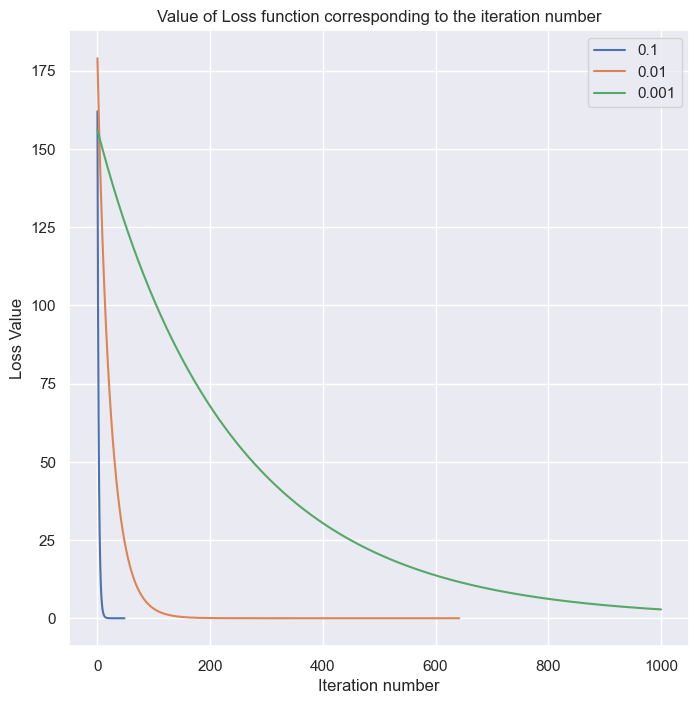

In [124]:
# your code goes here
# When I saw how Alpha value had to be changed so dramatically
# and how much better and faster prediction has become I was shocked O_o
plt.figure(figsize=(8,8))
plt.xlabel('Iteration number')
plt.ylabel('Loss Value')
plt.title('Value of Loss function corresponding to the iteration number')


a=0.1
new_legend = [a]
#Plot for Alpha in [0.1, 0.01, 0.001]
for i in range(3):
  ws = np.random.random(m)
  result = gradDescent(ws, a, X, datY, 1000)
  result[0][-1], result[1][-1]
  losses_k = result[1]
  iter_count = len(losses_k)
  k = range(iter_count)
  plt.plot(k, losses_k)
  a/=10
  new_legend.append(a)
  #print(f"Loss = {result[1][-1]}\nW_i = {result[0][-1]}")
plt.legend(new_legend)


### Task 8. Better pay twice  (1 point)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money.

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [122]:
def new_loss(w, X, y, a, b):
    #your code goes here
    losses = y - X @ w
    coef = [a if diff >= 0 else b for diff in losses]
    losses = losses ** 2
    losses = coef * losses
    lossValue = np.mean(losses)
    return lossValue

def new_grad(w_k, X, y, a, b):
    #your code goes here
    losses = (y - X @ w_k)
    coef = [a if diff >= 0 else b for diff in losses]
    losses *= coef
    lossGradient = -2 / N * X.T @ losses
    return lossGradient

def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]

    curiter=0
    w_k=weights[-1]

    #your code goes here
    losses = [new_loss(w_init, X, y, a, b)]
    while curiter < maxiter:
      gradient = new_grad(w_k, X, y, a, b)
      w_k = w_k - alpha * gradient
      weights.append(w_k)
      lossValue_k = new_loss(w_k, X, y, a, b)
      losses.append(lossValue_k)
      if len(losses) > 1 and np.linalg.norm(gradient) < eps:
          break
      curiter += 1
    return weights, losses

### Task 9. More experiments! (2 points)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

,Loss,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10
0,0.007184,13.648965,-0.021588,-0.035233,0.040859,-0.023100,0.060031,0.158567,0.264287,0.121328,-0.049009,0.222657
1,0.035098,13.423081,-0.025292,-0.021587,0.012998,-0.014555,0.060935,0.176982,0.251831,0.127499,-0.049751,0.223326
2,0.038844,12.916779,-0.015801,0.019346,0.060507,0.017021,0.067616,0.183857,0.133873,0.075238,-0.016072,0.185063


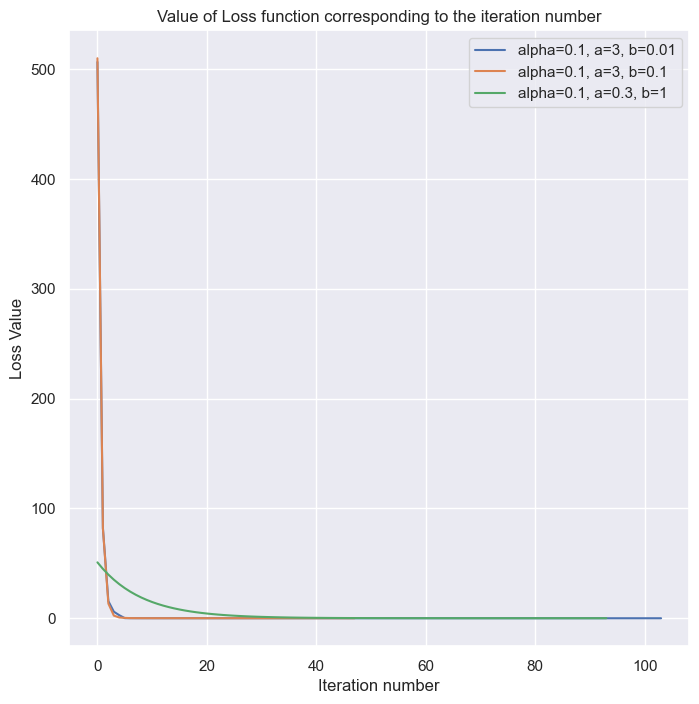

In [123]:
# your code goes here
plt.figure(figsize=(8,8))
plt.xlabel('Iteration number')
plt.ylabel('Loss Value')
plt.title('Value of Loss function corresponding to the iteration number')

ab=[(3,0.01), (3, 0.1), (0.3,1)]
alpha=0.1
new_legend = []
W = []
Losses = []
min_loss = 111
ws = np.random.random(m)

for pair in ab:
  a, b = pair
  ws = np.random.random(m) * ws
  result = new_gradDescent(ws, alpha, X, datY, a, b, 200)
  if result[1][-1] < min_loss:
    min_loss = result[1][-1]
    best = a, b, result[1][-1], result[0][-1]
  Losses.append(result[1][-1])
  W.append(result[0][-1])
  losses_k = result[1]
  iter_count = len(losses_k)
  k = range(iter_count)
  plt.plot(k, losses_k)
  new_legend.append(f"alpha={alpha}, a={a}, b={b}")
  plt.legend(new_legend)

Losses = pd.DataFrame(Losses)
W = pd.DataFrame(W)
W = pd.DataFrame(np.concatenate([Losses, W], axis=1))
cols = ["Loss"]
cols.extend(['w_'+str(i) for i in range(11)])
W.columns = cols
W

### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1. With too small learning rate $\alpha$ solution might not convert to a Loss function minima fast enough.
With different $a$ to $b$ ratios weights might differ because different features might influence Loss function in opposite ways. For example values of some features might bring more weight in price being underestimated.

2. We should choose parameter b depending on our goal. If we want our prediction to overestimate the target value, rather then underestimate it, we should choose $b$ in such a way, that difference between our prediction and actual values contributes more, if our prediction is greater than actual value, so $b$ should be greater than $a$
